# <center>Travelling Salesman Problem</center>

## Approach:
We will modify the Stochastic Search algorithm to solve the TSP optimisation problem. The initial population generate children by random swapping the elements in the parent solution. The total distance covered is the objective function for this problem which we want to minimize. We will start from city '0' and come back to city '0' while covering all the cities.

### Import necessary Libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the Distance Matrix

In [92]:
dist_matr = np.genfromtxt("dist_matrix_TSP.csv",delimiter=',')
print(dist_matr)

[[  0.  83.  93. 129. 133. 139. 151. 169. 135. 114. 110.  98.  99.  95.
   81. 152. 159. 181. 172. 185. 147. 157. 185. 220. 127. 181.]
 [ 83.   0.  40.  53.  62.  64.  91. 116.  93.  84.  95.  98.  89.  68.
   67. 127. 156. 175. 152. 165. 160. 180. 223. 268. 179. 197.]
 [ 93.  40.   0.  42.  42.  49.  59.  81.  54.  44.  58.  64.  54.  31.
   36.  86. 117. 135. 112. 125. 124. 147. 193. 241. 157. 161.]
 [129.  53.  42.   0.  11.  11.  46.  72.  65.  70.  88. 100.  89.  66.
   76. 102. 142. 156. 127. 139. 155. 180. 228. 278. 197. 190.]
 [133.  62.  42.  11.   0.   9.  35.  61.  55.  62.  82.  95.  84.  62.
   74.  93. 133. 146. 117. 128. 148. 173. 222. 272. 194. 182.]
 [139.  64.  49.  11.   9.   0.  39.  65.  63.  71.  90. 103.  92.  71.
   82. 100. 141. 153. 124. 135. 156. 181. 230. 280. 202. 190.]
 [151.  91.  59.  46.  35.  39.   0.  26.  34.  52.  71.  88.  77.  63.
   78.  66. 110. 119.  88.  98. 130. 156. 206. 257. 188. 160.]
 [169. 116.  81.  72.  61.  65.  26.   0.  37.  59.  75

In [93]:
print(dist_matr.shape)

(26, 26)


In [94]:
print((dist_matr==dist_matr.T).all())

True


### Define the Distance function

In [95]:
def dist_func(a,dist_matrix):  ## Function to calculate the distance covered for a vector solution
    total_distance = 0
    i = 0
    for j in range(len(a)):
        total_distance += dist_matrix[a[j]][i]
        i = a[j]
    total_distance += dist_matrix[i][0]
    return total_distance

### Function to Swap two elements

In [96]:
def swap(x): # Helper function to generate children from the parent solution by swapping two elements
    sampled_idx = np.random.choice(len(x),2,replace=False)
    x[sampled_idx[0]],x[sampled_idx[1]] = x[sampled_idx[1]],x[sampled_idx[0]]
    return x

### Random re-initialize points

In [97]:
def rrI(arr,rri_num):  # Function to generate the Random Reinitialisation vectors
    rri = []
    for i in range(rri_num):
        new = np.random.permutation(arr)
        rri.append(new)
    rri = np.matrix(rri)
    return rri

### Function to obtain Optimum Path

In [98]:
def Optimum_path(path,dist_matrix,popsize,rri_num,maxIter):
    ## Generate the initial population
    population = []
    for i in range(popsize):
        random_path = np.random.permutation(path)
        population.append(random_path)
    population = np.matrix(population)
    
    ## Main Loop begins
    for itr in range(maxIter):
        y_arr = []
        for i in range(population.shape[0]):
            a = np.ravel(population[i,:])
            y = dist_func(a,dist_matrix)
            y_arr.append(y)
        
        u_arr = [y_arr[i]-min(y_arr) for i in range(len(y_arr))]
        fit_score = [u_arr[i]/sum(u_arr) for i in range(len(u_arr))]
        child_num = [int(fit_score[i]*popsize) for i in range(len(y_arr))]
        child_arr = []
    ## Generate the children population
        for i in range(len(y_arr)):
            x_i = np.ravel(population[i,:])
            for j in range(child_num[i]):
                c = swap(x_i)
                child_arr.append(c)
        child_mat = np.matrix(child_arr)
    ## Generate the RRI population
        rri = rrI(path,rri_num)
        
        total_pop = np.vstack((population,child_mat,rri))
        fitness_arr = []
        
        for i in range(total_pop.shape[0]):
            a = np.ravel(total_pop[i,:])
            d = dist_func(a,dist_matrix)
            fitness_arr.append(d)
        
        fitness_arr = np.array(fitness_arr)
        min_idx = np.argsort(fitness_arr)
        
        useful_idx = min_idx[:popsize]
        useful_dist = fitness_arr[useful_idx]
        
        min_dist_idx = useful_idx[0]
        best_memb = total_pop[min_dist_idx,:]
        best_dist = useful_dist[0]
        
        print("Iteration: ",itr+1)
        print("Best Path till now is {}".format(best_memb))
        print("Best Distance till now is {}".format(best_dist))
        popList = []
        for i in range(len(useful_idx)):
            idx = useful_idx[i]
            popMember = np.ravel(total_pop[idx,:])
            popList.append(popMember)
        population = np.matrix(popList)
    return best_memb

In [99]:
path = np.arange(1,26,1)
print(path)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [100]:
opt_path = Optimum_path(path,dist_matr,300,200,200)

 is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Distance till now is 1630.0
Iteration:  70
Best Path till now is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Distance till now is 1630.0
Iteration:  71
Best Path till now is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Distance till now is 1630.0
Iteration:  72
Best Path till now is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Distance till now is 1630.0
Iteration:  73
Best Path till now is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Distance till now is 1630.0
Iteration:  74
Best Path till now is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Distance till now is 1630.0
Iteration:  75
Best Path till now is [[13 11 25 22 23 24 17 18  9  7  1  4  6  2  5  3  8 14 15 16 19 21 20 12
  10]]
Best Dist

## Optimal Answer to this problem 

In [101]:
ans = np.array([24,23,22,25,21,20,16,17,19,18,15,10,11,12,14,13,9,8,7,6,4,5,3,2,1])
print("The minimum distance path is:")
print(str(0)+"->",end="")
for i in range(len(ans)):
    print(str(ans[i])+"->",end="")
print(str(0))
print("Minimum possible distance is {}".format(dist_func(ans,dist_matr)))

The minimum distance path is:
0->24->23->22->25->21->20->16->17->19->18->15->10->11->12->14->13->9->8->7->6->4->5->3->2->1->0
Minimum possible distance is 937.0


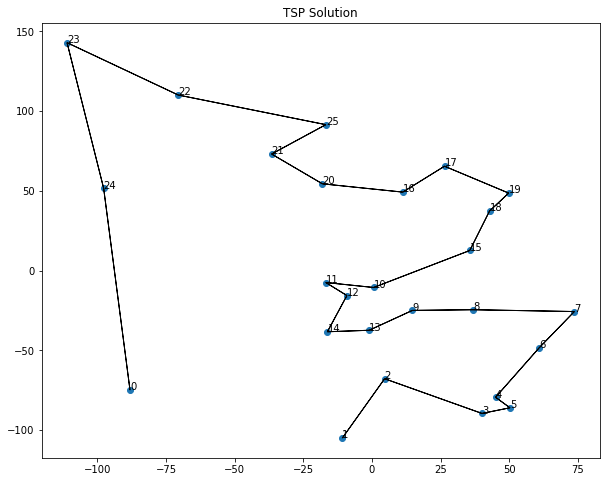

In [102]:
from sklearn.manifold import MDS #Multi-dimensional scaling
model = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out = model.fit_transform(dist_matr)

n = np.arange(26)
x = out[:,0]
y = out[:,1]
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
ax.arrow(x[0],y[0],x[ans[0]]-x[0],y[ans[0]]-y[0])
for i,txt in enumerate(n):
    if(i<24):
        ax.arrow(x[ans[i]],y[ans[i]],x[ans[i+1]]-x[ans[i]],y[ans[i+1]]-y[ans[i]])
    ax.annotate(txt,(x[i],y[i]))
plt.title("TSP Solution")
plt.show()